In [65]:
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
from matplotlib.lines import Line2D

In [3]:
commodities = pd.read_csv("Resources/commodity_futures.csv", index_col="Date")
commodities.head()

,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,LIVE CATTLE,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,456.50,200.75,NaN,NaN,NaN,69.700,...,1237.50,NaN,8446.0,247.50,6.10,NaN,116.50,55.975,274.25,51.07
2000-01-04,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,5.375,213.50,69.075,...,1215.00,67.78,8314.0,247.25,5.77,NaN,116.25,55.625,274.00,50.73
2000-01-05,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,5.210,213.00,68.975,...,1209.25,66.55,8307.0,249.75,5.81,NaN,118.60,55.075,276.25,51.56
2000-01-06,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,5.167,211.25,70.075,...,1212.00,66.28,8252.0,248.50,5.77,NaN,116.85,55.175,275.00,52.08
2000-01-07,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,5.195,205.25,70.875,...,1209.25,64.75,8174.0,251.75,5.84,NaN,114.15,55.625,277.75,53.96


In [4]:
new_commodities = commodities.fillna(0)
new_commodities.head()

,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,LIVE CATTLE,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.000,0.0,0.00,0.00,456.50,200.75,0.0000,0.000,0.00,69.700,...,1237.50,0.00,8446.0,247.50,6.10,0.0,116.50,55.975,274.25,51.07
2000-01-04,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,5.375,213.50,69.075,...,1215.00,67.78,8314.0,247.25,5.77,0.0,116.25,55.625,274.00,50.73
2000-01-05,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,5.210,213.00,68.975,...,1209.25,66.55,8307.0,249.75,5.81,0.0,118.60,55.075,276.25,51.56
2000-01-06,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,5.167,211.25,70.075,...,1212.00,66.28,8252.0,248.50,5.77,0.0,116.85,55.175,275.00,52.08
2000-01-07,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,5.195,205.25,70.875,...,1209.25,64.75,8174.0,251.75,5.84,0.0,114.15,55.625,277.75,53.96


In [5]:
eur_to_usd = 1.09
usd_commodities = new_commodities*eur_to_usd
usd_commodities.head()

,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,LIVE CATTLE,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.00000,0.000,0.0000,0.0000,497.5850,218.8175,0.000000,0.00000,0.0000,75.97300,...,1348.8750,0.0000,9206.14,269.7750,6.6490,0.0,126.9850,61.01275,298.9325,55.6663
2000-01-04,2.37184,309.233,27.8495,26.5851,506.0325,221.2700,0.924320,5.85875,232.7150,75.29175,...,1324.3500,73.8802,9062.26,269.5025,6.2893,0.0,126.7125,60.63125,298.6600,55.2957
2000-01-05,2.36312,307.489,27.1519,25.8657,511.4825,221.2700,0.933585,5.67890,232.1700,75.18275,...,1318.0825,72.5395,9054.63,272.2275,6.3329,0.0,129.2740,60.03175,301.1125,56.2004
2000-01-06,2.39364,307.816,27.0102,25.7458,510.1200,222.0875,0.929770,5.63203,230.2625,76.38175,...,1321.0800,72.2452,8994.68,270.8650,6.2893,0.0,127.3665,60.14075,299.7500,56.7672
2000-01-07,2.36857,308.361,26.3998,25.1681,513.9350,225.6300,0.930860,5.66255,223.7225,77.25375,...,1318.0825,70.5775,8909.66,274.4075,6.3656,0.0,124.4235,60.63125,302.7475,58.8164


In [6]:
usd_commodities = usd_commodities.rename(columns={
    'NATURAL GAS':'Natural Gas (USD/MMBtu)',
    'GOLD':'Gold (USD/t oz)',
    'WTI CRUDE':'WTI Crude (USD/bbl)',
    'BRENT CRUDE':'Brent Crude (USD/bbl)',
    'SOYBEANS':'Soybeans (USD/bushel)',
    'CORN':'Corn (USD/bushel)',
    'COPPER':'Copper (USD/lb)',
    'SILVER':'Silver (USD/t oz)',
    'LOW SULPHUR GAS OIL':'Low Sulphur Gas Oil (USD/MT)',
    'LIVE CATTLE':'Live Cattle (USD/lb)',
    'SOYBEAN OIL':'Soybean Oil (USD/lb)',
    'ALUMINIUM':'Aluminum (USD/MT)',
    'SOYBEAN MEAL':'Soybean Meal (USD/T)',
    'ZINC':'Zinc (USD/MT)',
    'ULS DIESEL':'ULS Diesel (USD/gal)',
    'NICKEL':'Nickel (USD/MT)',
    'WHEAT':'Wheat (USD/bushel)',
    'SUGAR':'Sugar (USD/lb)',
    'GASOLINE':'Gasoline (USD/gal)',
    'COFFEE':'Coffee (USD/lb)',
    'LEAN HOGS':'Lean Hog (USD/lb)',
    'HRW WHEAT':'HRW Wheat (USD/bushel)',
    'COTTON':'Cotton (USD/lb)'
})
usd_commodities.head()

,Natural Gas (USD/MMBtu),Gold (USD/t oz),WTI Crude (USD/bbl),Brent Crude (USD/bbl),Soybeans (USD/bushel),Corn (USD/bushel),Copper (USD/lb),Silver (USD/t oz),Low Sulphur Gas Oil (USD/MT),Live Cattle (USD/lb),...,Zinc (USD/MT),ULS Diesel (USD/gal),Nickel (USD/MT),Wheat (USD/bushel),Sugar (USD/lb),Gasoline (USD/gal),Coffee (USD/lb),Lean Hog (USD/lb),HRW Wheat (USD/bushel),Cotton (USD/lb)
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.00000,0.000,0.0000,0.0000,497.5850,218.8175,0.000000,0.00000,0.0000,75.97300,...,1348.8750,0.0000,9206.14,269.7750,6.6490,0.0,126.9850,61.01275,298.9325,55.6663
2000-01-04,2.37184,309.233,27.8495,26.5851,506.0325,221.2700,0.924320,5.85875,232.7150,75.29175,...,1324.3500,73.8802,9062.26,269.5025,6.2893,0.0,126.7125,60.63125,298.6600,55.2957
2000-01-05,2.36312,307.489,27.1519,25.8657,511.4825,221.2700,0.933585,5.67890,232.1700,75.18275,...,1318.0825,72.5395,9054.63,272.2275,6.3329,0.0,129.2740,60.03175,301.1125,56.2004
2000-01-06,2.39364,307.816,27.0102,25.7458,510.1200,222.0875,0.929770,5.63203,230.2625,76.38175,...,1321.0800,72.2452,8994.68,270.8650,6.2893,0.0,127.3665,60.14075,299.7500,56.7672
2000-01-07,2.36857,308.361,26.3998,25.1681,513.9350,225.6300,0.930860,5.66255,223.7225,77.25375,...,1318.0825,70.5775,8909.66,274.4075,6.3656,0.0,124.4235,60.63125,302.7475,58.8164


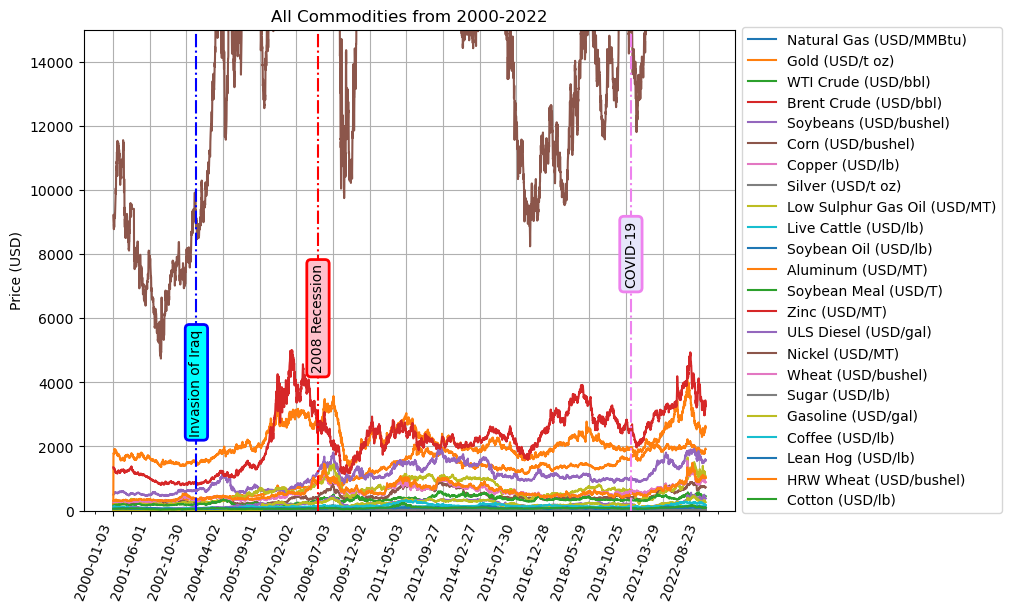

In [152]:
fig, axs = plt.subplots(figsize=(10,6), constrained_layout=True)
ax = plt.gca()
ax.plot(usd_commodities, label=usd_commodities.columns)
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1,7)))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=70, horizontalalignment='right')
ax.grid(True)
ax.set_ylabel('Price (USD)')
ax.set_ylim(0, 15000)
plt.axvline(x='2003-03-20',color='b', linestyle='dashdot')
t_iraq = ax.text(
    '2003-03-20', 4000, "Invasion of Iraq", ha="center", va="center", rotation=90, size=10,
    bbox=dict(boxstyle="round,pad=0.3", fc="cyan", ec="b", lw=2))
plt.axvline(x='2007-12-03',color='r', linestyle='dashdot')
t_2008depression = ax.text(
    '2007-12-03', 6000, "2008 Recession", ha="center", va="center", rotation=90, size=10,
    bbox=dict(boxstyle="round,pad=0.3", fc="pink", ec="red", lw=2))
plt.axvline(x='2020-01-03',color='violet', linestyle='dashdot')
t_covid2019 = ax.text(
    '2020-01-03', 8000, "COVID-19", ha="center", va="center", rotation=90, size=10,
    bbox=dict(boxstyle="round,pad=0.3", fc="lavender", ec="violet", lw=2))
plt.title('All Commodities from 2000-2022')
plt.legend(loc='upper left', bbox_to_anchor=(1,1.02))
plt.savefig("outputs/all_commodities.png")
plt.show()

In [7]:
per_commodity = usd_commodities.agg(["mean", "median", "var", "std", "sem"])
per_commodity

,Natural Gas (USD/MMBtu),Gold (USD/t oz),WTI Crude (USD/bbl),Brent Crude (USD/bbl),Soybeans (USD/bushel),Corn (USD/bushel),Copper (USD/lb),Silver (USD/t oz),Low Sulphur Gas Oil (USD/MT),Live Cattle (USD/lb),...,Zinc (USD/MT),ULS Diesel (USD/gal),Nickel (USD/MT),Wheat (USD/bushel),Sugar (USD/lb),Gasoline (USD/gal),Coffee (USD/lb),Lean Hog (USD/lb),HRW Wheat (USD/bushel),Cotton (USD/lb)
mean,4.964871,1137.770818,68.118087,71.660508,1053.775212,432.813346,2.816028,17.331840,632.711237,114.213431,...,2252.736237,206.658028,1.736901e+04,570.164093,15.514875,172.503214,138.756788,78.385903,594.553535,77.358304
median,4.287515,1300.533500,65.002150,68.343000,1035.772500,399.757500,3.046823,17.546820,612.988750,111.834000,...,2246.762500,202.009700,1.583443e+04,544.455000,14.578750,187.877850,131.018000,74.705875,535.053750,71.629350
var,5.965030,321665.428819,813.591763,1034.367297,135557.298415,31506.210741,1.500969,85.329903,82536.131211,715.475855,...,857527.357495,8438.065073,7.072477e+07,43246.217912,39.647520,13626.540123,3067.581250,338.320593,48263.027694,772.112229
std,2.442341,567.155560,28.523530,32.161581,368.181067,177.499889,1.225140,9.237419,287.291022,26.748380,...,926.027730,91.858941,8.409802e+03,207.957250,6.296628,116.732772,55.385750,18.393493,219.688479,27.786908
sem,0.031775,7.378736,0.371093,0.418425,4.790063,2.309287,0.015939,0.120179,3.737677,0.347998,...,12.047689,1.195092,1.094121e+02,2.705539,0.081920,1.518702,0.720573,0.239301,2.858163,0.361510


<AxesSubplot:>

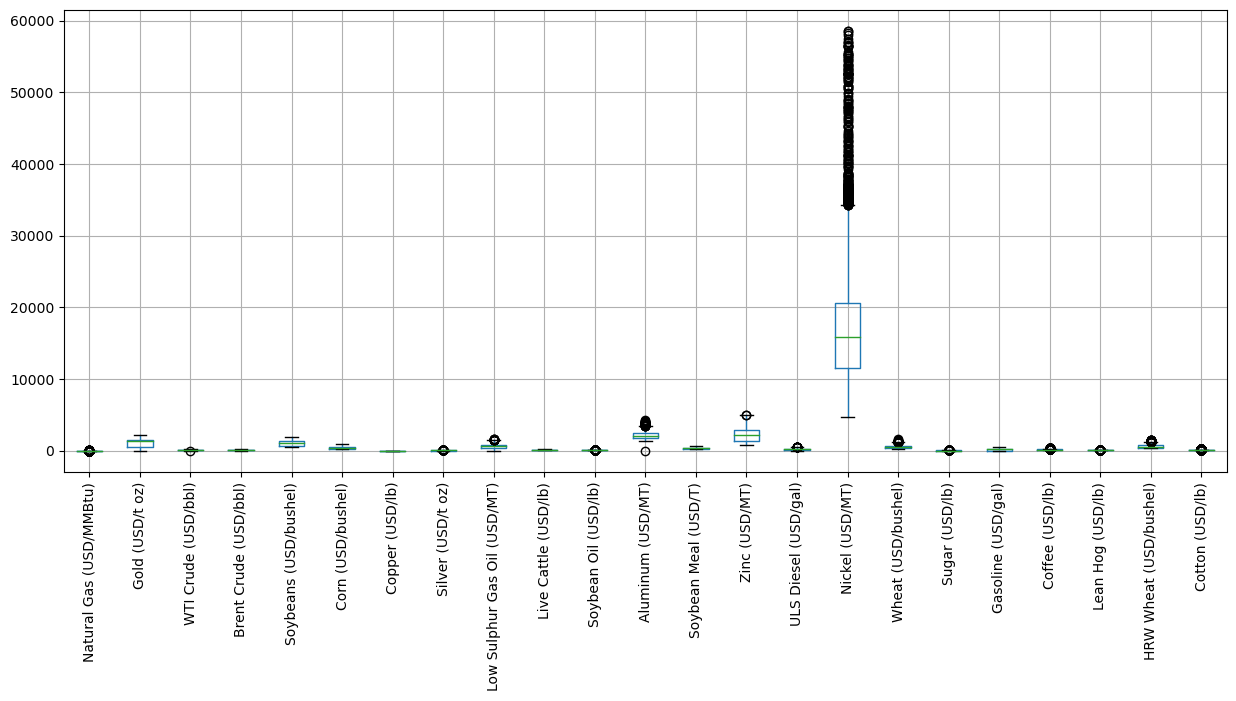

In [8]:
usd_commodities.boxplot(rot=90, figsize=(15,6))

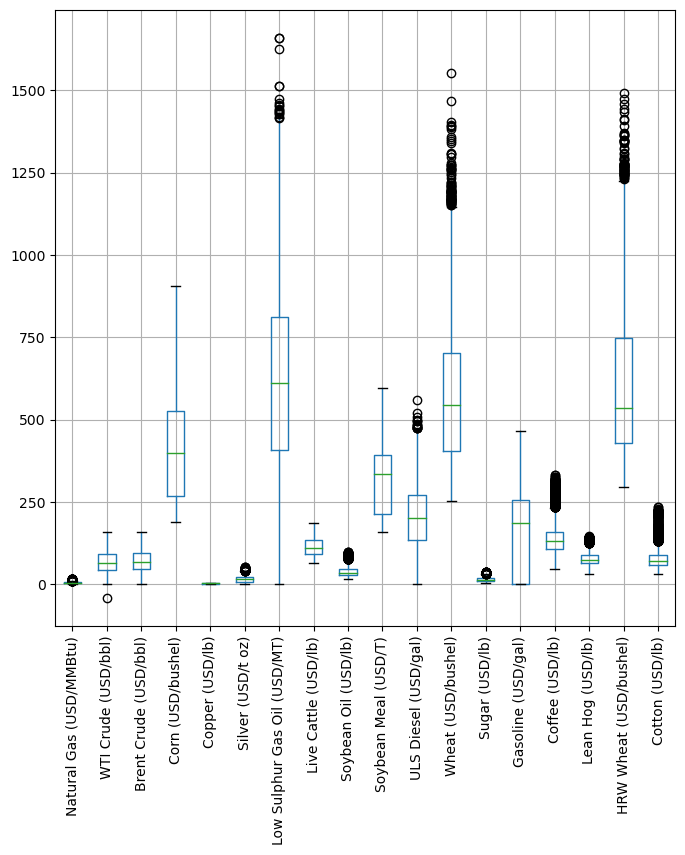

In [9]:
usd_commodities.drop(["Nickel (USD/MT)","Gold (USD/t oz)","Soybeans (USD/bushel)", "Aluminum (USD/MT)","Zinc (USD/MT)"],axis=1).boxplot(rot=90, figsize=(8,8))
plt.show()

In [10]:
energy = usd_commodities[['Natural Gas (USD/MMBtu)', 'Low Sulphur Gas Oil (USD/MT)', 'WTI Crude (USD/bbl)', 'Brent Crude (USD/bbl)', 'ULS Diesel (USD/gal)', 'Gasoline (USD/gal)']]
energy.head()

,Natural Gas (USD/MMBtu),Low Sulphur Gas Oil (USD/MT),WTI Crude (USD/bbl),Brent Crude (USD/bbl),ULS Diesel (USD/gal),Gasoline (USD/gal)
Date,,,,,,
2000-01-03,0.00000,0.0000,0.0000,0.0000,0.0000,0.0
2000-01-04,2.37184,232.7150,27.8495,26.5851,73.8802,0.0
2000-01-05,2.36312,232.1700,27.1519,25.8657,72.5395,0.0
2000-01-06,2.39364,230.2625,27.0102,25.7458,72.2452,0.0
2000-01-07,2.36857,223.7225,26.3998,25.1681,70.5775,0.0


In [27]:
energy_stats = energy.agg(["mean", "median", "var", "std", "sem"])
energy_stats

,Natural Gas (USD/MMBtu),Low Sulphur Gas Oil (USD/MT),WTI Crude (USD/bbl),Brent Crude (USD/bbl),ULS Diesel (USD/gal),Gasoline (USD/gal)
mean,4.964871,632.711237,68.118087,71.660508,206.658028,172.503214
median,4.287515,612.988750,65.002150,68.343000,202.009700,187.877850
var,5.965030,82536.131211,813.591763,1034.367297,8438.065073,13626.540123
std,2.442341,287.291022,28.523530,32.161581,91.858941,116.732772
sem,0.031775,3.737677,0.371093,0.418425,1.195092,1.518702


In [11]:
softs = usd_commodities[['Sugar (USD/lb)', 'Coffee (USD/lb)', 'Cotton (USD/lb)']]
softs.head()

,Sugar (USD/lb),Coffee (USD/lb),Cotton (USD/lb)
Date,,,
2000-01-03,6.6490,126.9850,55.6663
2000-01-04,6.2893,126.7125,55.2957
2000-01-05,6.3329,129.2740,56.2004
2000-01-06,6.2893,127.3665,56.7672
2000-01-07,6.3656,124.4235,58.8164


In [28]:
softs_stats = softs.agg(["mean", "median", "var", "std", "sem"])
softs_stats

,Sugar (USD/lb),Coffee (USD/lb),Cotton (USD/lb)
mean,15.514875,138.756788,77.358304
median,14.578750,131.018000,71.629350
var,39.647520,3067.581250,772.112229
std,6.296628,55.385750,27.786908
sem,0.081920,0.720573,0.361510


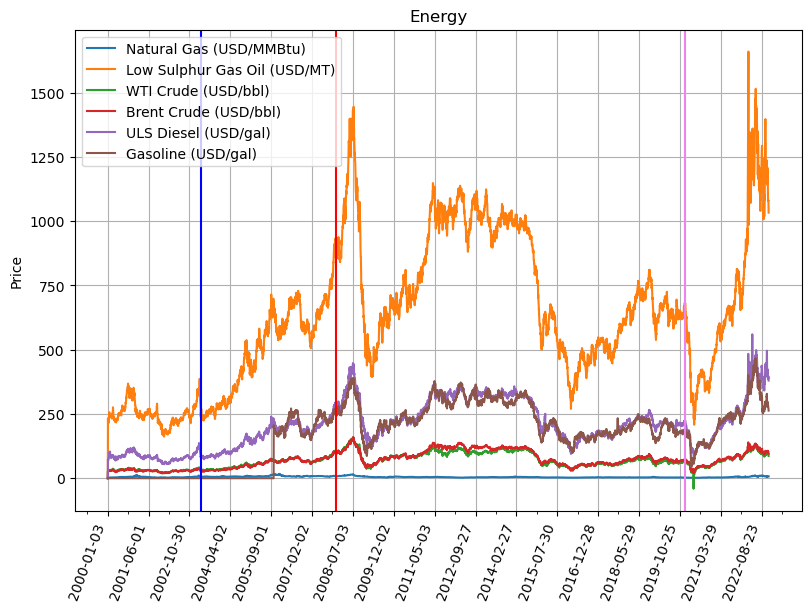

In [137]:
fig, axs = plt.subplots(figsize=(8,6), constrained_layout=True)
ax = plt.gca()
ax.plot(energy, label=energy.columns)
# x = energy.index
# ax.plot(x, energy["Natural Gas (USD/MMBtu)"], label="Natural Gas (USD/MMBtu)")
# ax.plot(x, energy["WTI Crude (USD/bbl)"],label="WTI Crude (USD/bbl)")
# ax.plot(x, energy["Brent Crude (USD/bbl)"],label="Brent Crude (USD/bbl)")
# ax.plot(x, energy["Gasoline (USD/gal)"], label="Gasoline (USD/gal)") # price skewed by factor of 100
# ax.plot(x, energy["ULS Diesel (USD/gal)"],label="ULS Diesel (USD/gal)") # price skewed by factor of 100
# ax.plot(x, energy["Low Sulphur Gas Oil (USD/MT)"],label="Low Sulphur Gas Oil (USD/MT)")
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1,7)))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=70, horizontalalignment='right')
ax.grid(True)
ax.set_ylabel('Price')
plt.axvline(x='2003-03-20',color='b')
plt.axvline(x='2007-12-03',color='r')
plt.axvline(x='2020-01-03',color='violet')
plt.title('Energy')
plt.legend()
plt.savefig("outputs/all_energy.png")
plt.show()

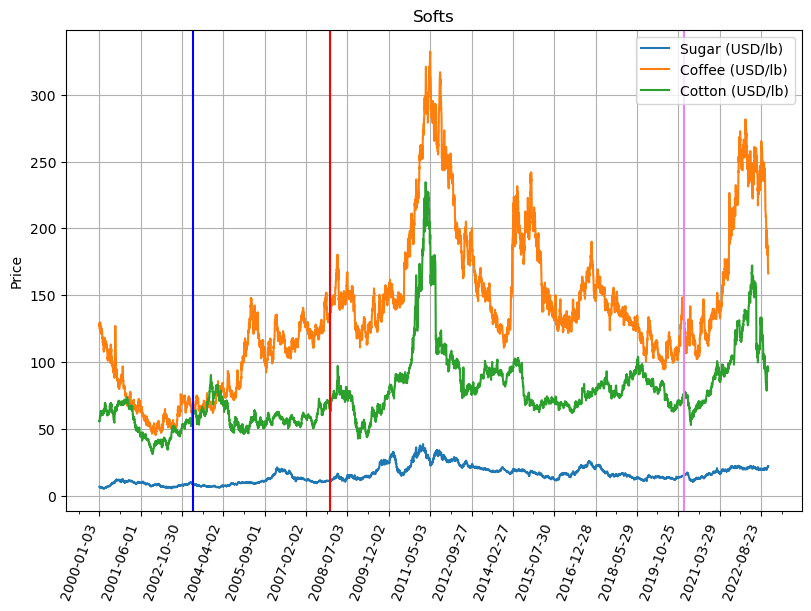

In [139]:
fig, axs = plt.subplots(figsize=(8,6), constrained_layout=True)
ax = plt.gca()
ax.plot(softs, label=softs.columns)
# x = softs.index
# ax.plot(x, softs["Sugar (USD/lb)"], label="Sugar (USD/lb)")
# ax.plot(x, softs["Coffee (USD/lb)"], label="Coffee (USD/lb)") # price skewed by factor of 100
# ax.plot(x, softs["Cotton (USD/lb)"], label="Cotton (USD/lb)")
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1,7)))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=70, horizontalalignment='right')
ax.grid(True)
ax.set_ylabel('Price')
plt.axvline(x='2003-03-20',color='b')
plt.axvline(x='2007-12-03',color='r')
plt.axvline(x='2020-01-03',color='violet')
plt.title('Softs')
plt.legend()
plt.savefig("outputs/all_softs.png")
plt.show()

In [14]:
iraq_energy = energy.loc['2001-07-01' : '2012-12-31']
iraq_energy.head()


,Natural Gas (USD/MMBtu),Low Sulphur Gas Oil (USD/MT),WTI Crude (USD/bbl),Brent Crude (USD/bbl),ULS Diesel (USD/gal),Gasoline (USD/gal)
Date,,,,,,
2001-07-02,3.39753,242.5250,28.2855,27.9476,77.4772,0.0
2001-07-03,3.48909,241.7075,28.6016,27.6424,78.0440,0.0
2001-07-04,3.48909,243.8875,28.6016,28.1220,78.0440,0.0
2001-07-05,3.41824,239.8000,29.4518,28.1656,78.9051,0.0
2001-07-06,3.50762,244.7050,30.7489,29.2229,80.4202,0.0


In [29]:
iraq_energy_stats = iraq_energy.agg(["mean", "median", "var", "std", "sem"])
iraq_energy_stats

,Natural Gas (USD/MMBtu),Low Sulphur Gas Oil (USD/MT),WTI Crude (USD/bbl),Brent Crude (USD/bbl),ULS Diesel (USD/gal),Gasoline (USD/gal)
mean,6.046263,629.191482,69.811870,72.164926,200.562148,155.800366
median,5.601510,615.168750,69.732750,70.097900,196.461600,193.480450
var,6.948706,90258.400976,911.915762,1210.026728,8682.144625,16745.040745
std,2.636040,300.430360,30.197943,34.785438,93.178027,129.402630
sem,0.048386,5.514573,0.554301,0.638507,1.710336,2.375260


In [15]:
iraq_softs = softs.loc['2001-07-01' : '2012-12-31']
iraq_softs.head()

,Sugar (USD/lb),Coffee (USD/lb),Cotton (USD/lb)
Date,,,
2001-07-02,9.5484,59.8410,44.8862
2001-07-03,9.2868,59.9500,44.0687
2001-07-04,9.2868,59.9500,44.0687
2001-07-05,9.2868,58.8600,44.7990
2001-07-06,9.1342,58.6965,44.8317


In [30]:
iraq_softs_stats = iraq_softs.agg(["mean", "median", "var", "std", "sem"])
iraq_softs_stats

,Sugar (USD/lb),Coffee (USD/lb),Cotton (USD/lb)
mean,15.180314,132.464931,72.669136
median,12.567700,124.559750,62.080950
var,62.759868,3946.610297,1097.128917
std,7.922113,62.822053,33.122936
sem,0.145415,1.153135,0.607991


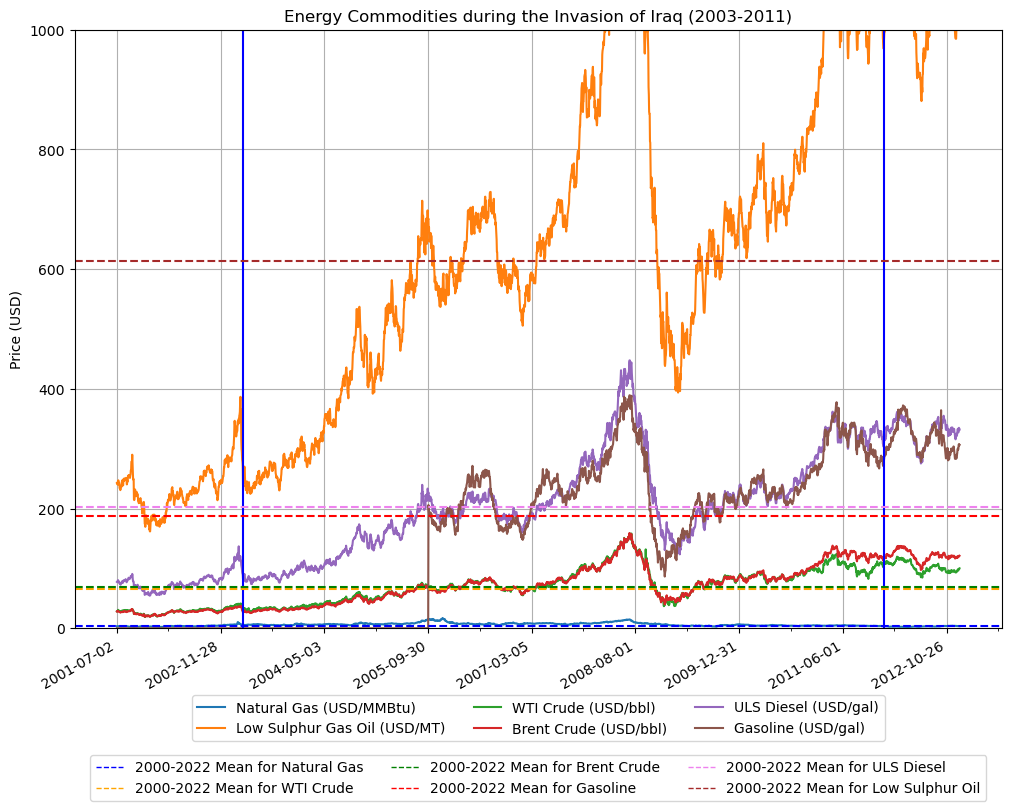

In [140]:
fig, axs = plt.subplots(figsize=(10,8), constrained_layout=True)
ax = plt.gca()
ax.plot(iraq_energy, label=iraq_energy.columns)
# x = iraq_energy.index
# ax.plot(x, iraq_energy["Natural Gas (USD/MMBtu)"], label="Natural Gas (USD/MMBtu)")
# ax.plot(x, iraq_energy["WTI Crude (USD/bbl)"],label="WTI Crude (USD/bbl)")
# ax.plot(x, iraq_energy["Brent Crude (USD/bbl)"],label="Brent Crude (USD/bbl)")
# ax.plot(x, iraq_energy["Gasoline (USD/gal)"], label="Gasoline (USD/gal)") # price skewed by factor of 100
# ax.plot(x, iraq_energy["ULS Diesel (USD/gal)"],label="ULS Diesel (USD/gal)") # price skewed by factor of 100
# ax.plot(x, iraq_energy["Low Sulphur Gas Oil (USD/MT)"],label="Low Sulphur Gas Oil (USD/MT)")
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1,7)))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
ax.grid(True)
ax.set_ylabel('Price (USD)')
ax.set_ylim(0, 1000)
plt.axvline(x='2003-03-20',color='b')
plt.axvline(x='2011-12-19',color='b')
plt.axhline(y=energy_stats['Natural Gas (USD/MMBtu)'][1], color='blue', linestyle='--')
plt.axhline(y=energy_stats['Low Sulphur Gas Oil (USD/MT)'][1], color='brown', linestyle='--')
plt.axhline(y=energy_stats['WTI Crude (USD/bbl)'][1], color='orange', linestyle='--')
plt.axhline(y=energy_stats['Brent Crude (USD/bbl)'][1], color='green', linestyle='--')
plt.axhline(y=energy_stats['ULS Diesel (USD/gal)'][1], color='violet', linestyle='--')
plt.axhline(y=energy_stats['Gasoline (USD/gal)'][1], color='red', linestyle='--')
plt.title('Energy Commodities during the Invasion of Iraq (2003-2011)')
legend1 = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.gca().add_artist(legend1)
colors = ['blue', 'orange', 'green', 'red', 'violet', 'brown']
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='--') for c in colors]
labels = ['2000-2022 Mean for Natural Gas', '2000-2022 Mean for WTI Crude', '2000-2022 Mean for Brent Crude', '2000-2022 Mean for Gasoline', '2000-2022 Mean for ULS Diesel', '2000-2022 Mean for Low Sulphur Oil']
plt.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.savefig("outputs/iraq_energy.png")
plt.show()

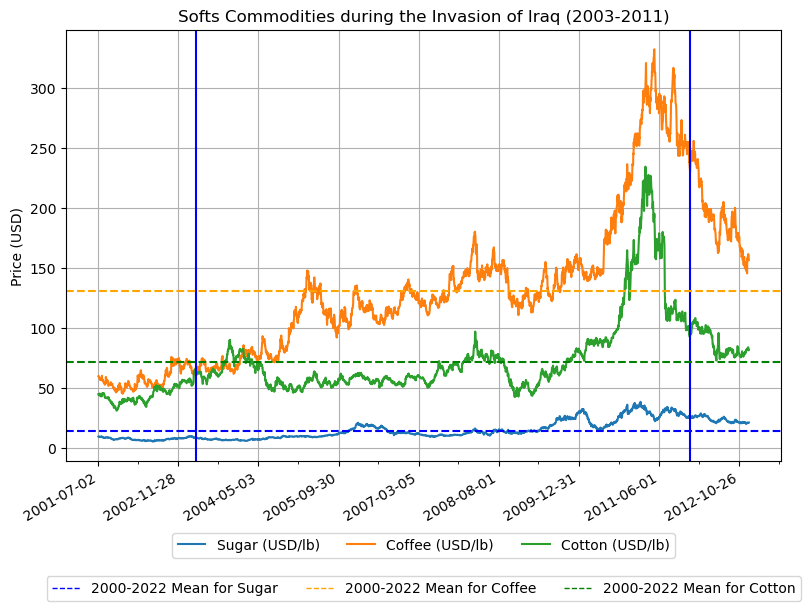

In [141]:
fig, axs = plt.subplots(figsize=(8,6), constrained_layout=True)
ax = plt.gca()
ax.plot(iraq_softs, label=iraq_softs.columns)
# x = iraq_softs.index
# ax.plot(x, iraq_softs["Sugar (USD/lb)"], label="Sugar (USD/lb)")
# ax.plot(x, iraq_softs["Coffee (USD/lb)"], label="Coffee (USD/lb)") # price skewed by factor of 100
# ax.plot(x, iraq_softs["Cotton (USD/lb)"], label="Cotton (USD/lb)")
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1,7)))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
ax.grid(True)
ax.set_ylabel('Price (USD)')
plt.axvline(x='2003-03-20',color='b')
plt.axvline(x='2011-12-19',color='b')
plt.axhline(y=softs_stats['Sugar (USD/lb)'][1], color='b', linestyle='dashed')
plt.axhline(y=softs_stats['Coffee (USD/lb)'][1], color='orange', linestyle='dashed')
plt.axhline(y=softs_stats['Cotton (USD/lb)'][1], color='green', linestyle='dashed')
legend1 = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.gca().add_artist(legend1)
colors = ['blue', 'orange', 'green']
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='--') for c in colors]
labels = ['2000-2022 Mean for Sugar', '2000-2022 Mean for Coffee', '2000-2022 Mean for Cotton']
plt.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=3)
plt.title('Softs Commodities during the Invasion of Iraq (2003-2011)')
plt.savefig("outputs/iraq_softs.png")
plt.show()

In [18]:
recession_energy = energy.loc['2007-06-01' : '2009-07-31']
recession_energy.head()

,Natural Gas (USD/MMBtu),Low Sulphur Gas Oil (USD/MT),WTI Crude (USD/bbl),Brent Crude (USD/bbl),ULS Diesel (USD/gal),Gasoline (USD/gal)
Date,,,,,,
2007-06-01,8.58702,645.5525,70.9372,75.2863,209.5852,244.6614
2007-06-04,8.92819,667.3525,72.1689,76.7360,214.1414,243.9420
2007-06-05,8.78976,667.0800,71.5149,76.7905,214.1196,240.5957
2007-06-06,8.80720,666.5350,71.8964,77.4118,215.1333,238.7536
2007-06-07,8.52925,673.0750,72.9537,77.6298,215.4276,239.0043


In [19]:
recession_softs = softs.loc['2007-06-01' : '2009-07-31']
recession_softs.head()

,Sugar (USD/lb),Coffee (USD/lb),Cotton (USD/lb)
Date,,,
2007-06-01,10.0716,127.9660,55.0232
2007-06-04,9.7228,125.6770,54.4891
2007-06-05,9.3304,127.0395,56.4075
2007-06-06,9.4721,126.9305,56.1895
2007-06-07,9.3522,127.4755,56.4184


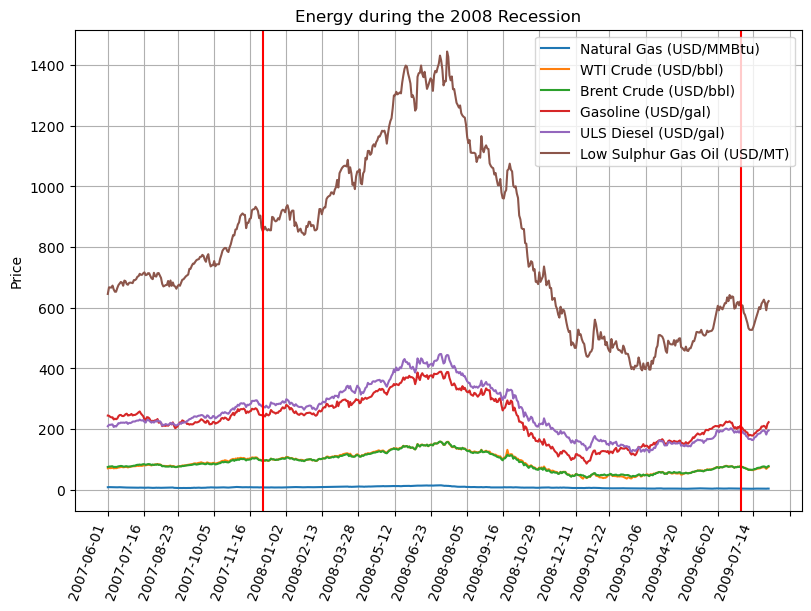

In [20]:
fig, axs = plt.subplots(figsize=(8,6), constrained_layout=True)
ax = plt.gca()
x = recession_energy.index
ax.plot(x, recession_energy["Natural Gas (USD/MMBtu)"], label="Natural Gas (USD/MMBtu)")
ax.plot(x, recession_energy["WTI Crude (USD/bbl)"],label="WTI Crude (USD/bbl)")
ax.plot(x, recession_energy["Brent Crude (USD/bbl)"],label="Brent Crude (USD/bbl)")
ax.plot(x, recession_energy["Gasoline (USD/gal)"], label="Gasoline (USD/gal)") # price skewed by factor of 100
ax.plot(x, recession_energy["ULS Diesel (USD/gal)"],label="ULS Diesel (USD/gal)") # price skewed by factor of 100
ax.plot(x, recession_energy["Low Sulphur Gas Oil (USD/MT)"],label="Low Sulphur Gas Oil (USD/MT)")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=70, horizontalalignment='right')
ax.grid(True)
ax.set_ylabel('Price')
plt.axvline(x='2007-12-03',color='r')
plt.axvline(x='2009-06-30',color='r')
plt.title('Energy during the 2008 Recession')
plt.legend()
plt.savefig("outputs/recession_energy.png")
plt.show()

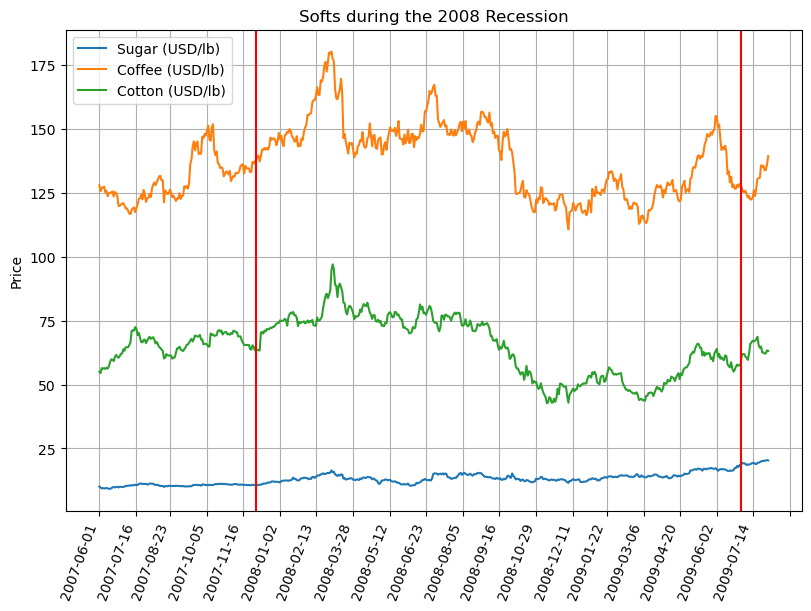

In [21]:
fig, axs = plt.subplots(figsize=(8,6), constrained_layout=True)
ax = plt.gca()
x = recession_softs.index
ax.plot(x, recession_softs["Sugar (USD/lb)"], label="Sugar (USD/lb)")
ax.plot(x, recession_softs["Coffee (USD/lb)"], label="Coffee (USD/lb)") # price skewed by factor of 100
ax.plot(x, recession_softs["Cotton (USD/lb)"], label="Cotton (USD/lb)")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=70, horizontalalignment='right')
ax.grid(True)
ax.set_ylabel('Price')
plt.axvline(x='2007-12-03',color='r')
plt.axvline(x='2009-06-30',color='r')
plt.title('Softs during the 2008 Recession')
plt.legend()
plt.savefig("outputs/recession_softs.png")
plt.show()

In [22]:
covid_energy = energy.loc['2020-01-01' : '2022-01-03']
covid_energy.head()

,Natural Gas (USD/MMBtu),Low Sulphur Gas Oil (USD/MT),WTI Crude (USD/bbl),Brent Crude (USD/bbl),ULS Diesel (USD/gal),Gasoline (USD/gal)
Date,,,,,,
2020-01-02,2.31298,670.8950,66.6862,72.2125,220.6269,185.7578
2020-01-03,2.32170,681.7950,68.7245,74.7740,224.6926,190.6192
2020-01-06,2.32715,675.8000,68.9643,75.1119,221.6951,191.2296
2020-01-07,2.35658,672.2575,68.3430,74.4143,221.5316,187.7198
2020-01-08,2.33369,660.8125,64.9749,71.3296,213.4438,179.7192


In [23]:
covid_softs = softs.loc['2020-01-01' : '2022-01-03']
covid_softs.head()

,Sugar (USD/lb),Coffee (USD/lb),Cotton (USD/lb)
Date,,,
2020-01-02,14.3117,138.5390,75.5043
2020-01-03,14.5079,137.7215,75.4280
2020-01-06,14.9657,133.1435,76.3436
2020-01-07,14.8131,133.4160,76.1147
2020-01-08,14.6823,129.8735,76.2564


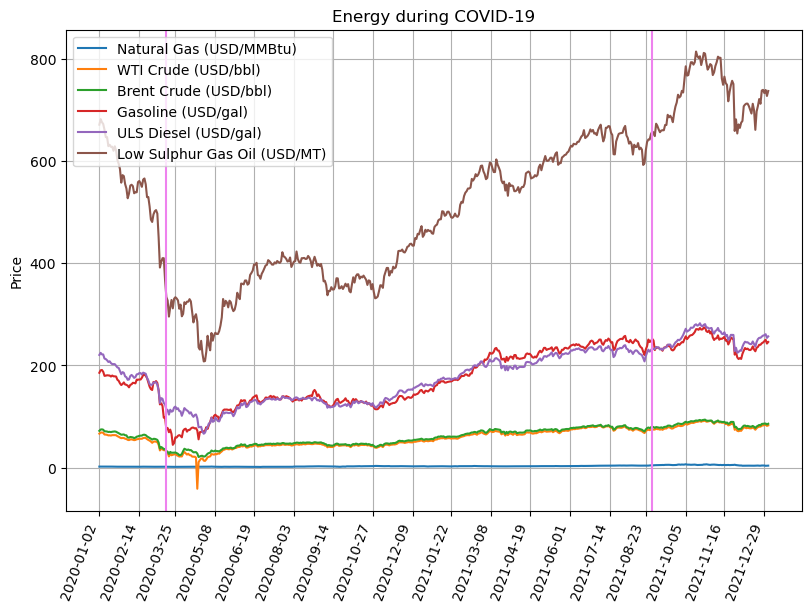

In [24]:
fig, axs = plt.subplots(figsize=(8,6), constrained_layout=True)
ax = plt.gca()
x = covid_energy.index
ax.plot(x, covid_energy["Natural Gas (USD/MMBtu)"], label="Natural Gas (USD/MMBtu)")
ax.plot(x, covid_energy["WTI Crude (USD/bbl)"],label="WTI Crude (USD/bbl)")
ax.plot(x, covid_energy["Brent Crude (USD/bbl)"],label="Brent Crude (USD/bbl)")
ax.plot(x, covid_energy["Gasoline (USD/gal)"], label="Gasoline (USD/gal)") # price skewed by factor of 100
ax.plot(x, covid_energy["ULS Diesel (USD/gal)"],label="ULS Diesel (USD/gal)") # price skewed by factor of 100
ax.plot(x, covid_energy["Low Sulphur Gas Oil (USD/MT)"],label="Low Sulphur Gas Oil (USD/MT)")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=70, horizontalalignment='right')
ax.grid(True)
ax.set_ylabel('Price')
plt.axvline(x='2020-03-16',color='violet')
plt.axvline(x='2021-08-30',color='violet')
plt.title('Energy during COVID-19')
plt.legend()
plt.savefig("outputs/covid_energy.png")
plt.show()

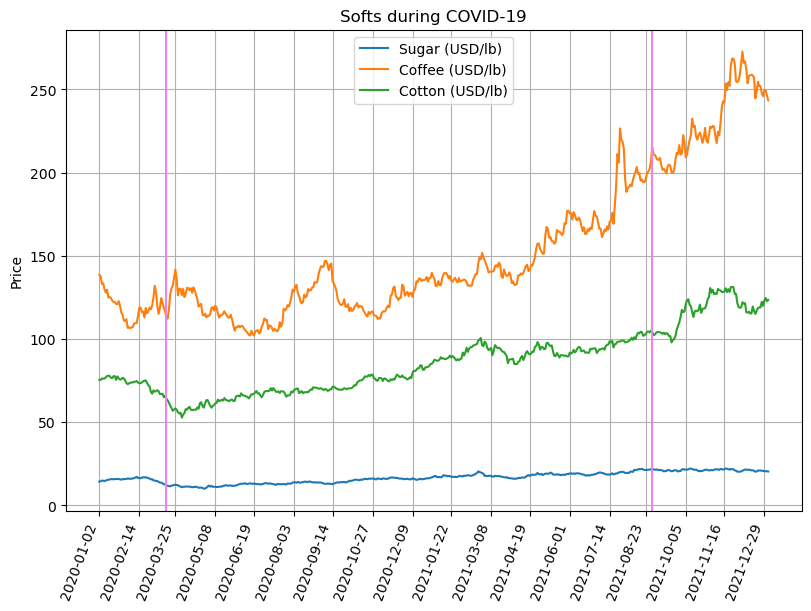

In [25]:
fig, axs = plt.subplots(figsize=(8,6), constrained_layout=True)
ax = plt.gca()
x =covid_softs.index
ax.plot(x, covid_softs["Sugar (USD/lb)"], label="Sugar (USD/lb)")
ax.plot(x, covid_softs["Coffee (USD/lb)"], label="Coffee (USD/lb)") # price skewed by factor of 100
ax.plot(x, covid_softs["Cotton (USD/lb)"], label="Cotton (USD/lb)")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=70, horizontalalignment='right')
ax.grid(True)
ax.set_ylabel('Price')
plt.axvline(x='2020-03-16',color='violet')
plt.axvline(x='2021-08-30',color='violet')
plt.title('Softs during COVID-19')
plt.legend()
plt.savefig("outputs/covid_softs.png")
plt.show()